In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv('dataset.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head(5)

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000,2.0,,nochg,2025,47.2917,-122.3658,53,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300,NaN,26,nochg,2025,47.6531,-122.1996,74,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000,1.0,,nochg,2025,47.4733,-122.1901,30,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000,1.0,,nochg,2025,47.4739,-122.3295,96,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1650000,2.0,,miss99,2025,47.7516,-122.1222,36,...,0,0,0,0,0,0,0,0,0,P


In [5]:
train.columns

Index(['id', 'sale_date', 'sale_price', 'sale_nbr', 'sale_warning',
       'join_status', 'join_year', 'latitude', 'longitude', 'area', 'city',
       'zoning', 'subdivision', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [3]:
def clean_data(df):
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    df['year'] = df['sale_date'].dt.year
    df['month'] = df['sale_date'].dt.month
    df['day'] = df['sale_date'].dt.day

    latest_sale_date = train['sale_date'].max()
    time_differnces = latest_sale_date - train['sale_date']
    train['age_of_sale_days'] = time_differnces.dt.days
    train['age_of_sale_years'] = (time_differnces / np.timedelta64(1, 'D')) / 365.25

    df.drop('sale_date', axis=1, inplace=True)

    df['land_val'] = np.log1p(df['land_val'])
    df['imp_val'] = np.log1p(df['imp_val'])

    
    df['val_ratio'] = df['land_val']/df['imp_val']
    df['total_baths'] = df['bath_full'] + 0.75*df['bath_3qtr'] + 0.5*df['bath_half']
    df['bath_to_beds'] = df['total_baths'] / df['beds']

    df.drop('sale_nbr', axis=1, inplace=True)

    try:
        df['sale_price'] = np.log1p(df['sale_price'])
    except KeyError:
        pass

    return df

In [7]:
train = clean_data(train)
train.head(5)

,id,sale_price,sale_warning,join_status,join_year,latitude,longitude,area,city,zoning,...,view_other,submarket,year,month,day,age_of_sale_days,age_of_sale_years,val_ratio,total_baths,bath_to_beds
0,0,12.371591,,nochg,2025,47.2917,-122.3658,53,FEDERAL WAY,RS7.2,...,0,I,2014,11,15,3714,10.168378,0.937560,1.75,0.583333
1,1,12.654920,26,nochg,2025,47.6531,-122.1996,74,KIRKLAND,RS 8.5,...,0,Q,1999,1,15,9497,26.001369,1.051353,2.25,0.750000
2,2,12.739641,,nochg,2025,47.4733,-122.1901,30,RENTON,R-8,...,0,K,2006,8,15,6728,18.420260,0.965825,2.50,0.833333
3,3,12.495008,,nochg,2025,47.4739,-122.3295,96,BURIEN,RS-7200,...,0,G,1999,12,15,9163,25.086927,0.923775,2.50,0.625000
4,4,14.316286,,miss99,2025,47.7516,-122.1222,36,KING COUNTY,RA2.5,...,0,P,2018,7,15,2376,6.505133,0.921523,3.25,0.812500


In [10]:
test['view_skyline'].max()

4

In [38]:
train['sale_price'].abs().max()

14.91410651316566

In [39]:
train['sale_price'].min()

10.825641064678658

In [40]:
train['sale_price'].isna().sum()

0

In [41]:
np.isinf(train['sale_price']).sum()

0

In [14]:
train[['beds', 'total_baths']].describe()

,beds,total_baths
count,200000.000000,200000.000000
mean,3.419390,2.196831
std,0.897639,0.761216
min,0.000000,0.000000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,14.000000,11.750000


In [4]:
train['land_val'] = np.log1p(train['land_val'])
train['imp_val'] = np.log1p(train['imp_val'])

In [7]:
train['val_sum'] = train['land_val'] + train['imp_val']
train['val_sum'].min()

0.0

In [9]:
train[train['land_val'] + train['imp_val'] == 0]

,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket,val_sum
144,144,2020-01-15,2884500,NaN,15,nochg,2025,47.2528,-122.1106,28,...,2,0,0,0,0,0,0,0,L,0.0
341,341,2007-08-15,235000,2.0,,nochg,2025,47.2132,-121.9876,41,...,0,0,0,0,0,0,0,0,M,0.0
533,533,2000-11-15,390000,NaN,,nochg,2025,47.3608,-121.9907,98,...,0,0,0,0,0,0,0,0,NaN,0.0
582,582,2013-05-15,440000,1.0,60,nochg,2025,47.6392,-122.1007,91,...,0,0,0,0,0,0,0,0,R,0.0
583,583,2005-12-15,284000,NaN,,nochg,2025,47.2129,-121.9797,41,...,0,0,0,0,0,0,0,0,M,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199574,199574,1999-05-15,178950,1.0,,nochg,2025,47.4635,-122.2145,59,...,0,0,0,0,0,0,0,0,K,0.0
199660,199660,2017-12-15,943000,3.0,40,rebuilt - before,1999,47.5009,-121.9022,75,...,0,0,0,0,0,0,0,0,N,0.0
199740,199740,2018-03-15,115000,1.0,15 26,nochg,2025,47.2839,-121.9267,98,...,0,0,0,0,0,0,0,0,NaN,0.0
199875,199875,2002-07-15,126500,2.0,,nochg,2025,47.3888,-122.2357,61,...,0,0,0,0,0,0,0,0,L,0.0


<AxesSubplot:xlabel='age_of_sale_years', ylabel='sale_price'>

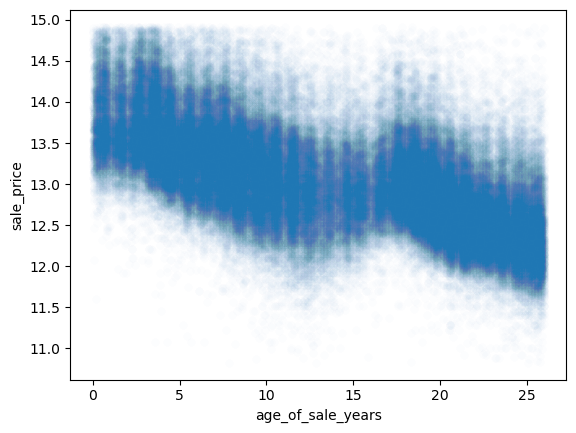

In [11]:
# clearly visible: GFC 2008/2009
sns.scatterplot(data=train, x="age_of_sale_years", y="sale_price", alpha=0.01)

<AxesSubplot:xlabel='age_of_sale_years', ylabel='sale_price'>

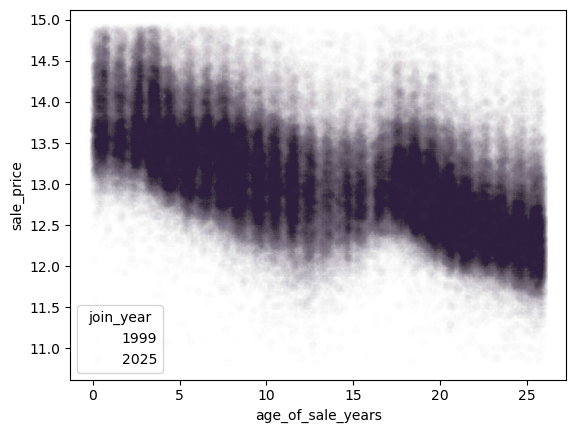

In [13]:
sns.scatterplot(data=train, x="age_of_sale_years", y="sale_price", hue="join_year", alpha=0.01)

<AxesSubplot:xlabel='join_year', ylabel='sale_price'>

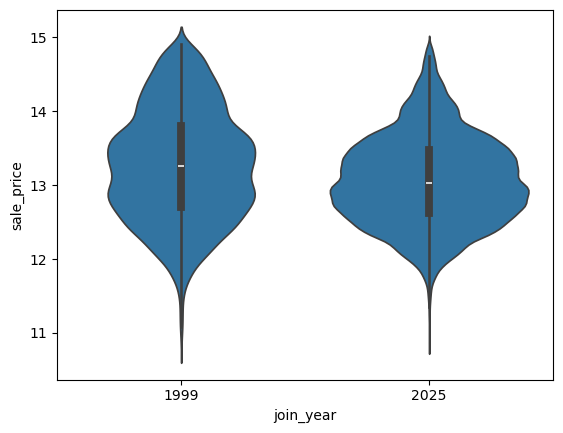

In [14]:
sns.violinplot(data=train, x="join_year", y="sale_price")

<AxesSubplot:xlabel='submarket', ylabel='sale_price'>

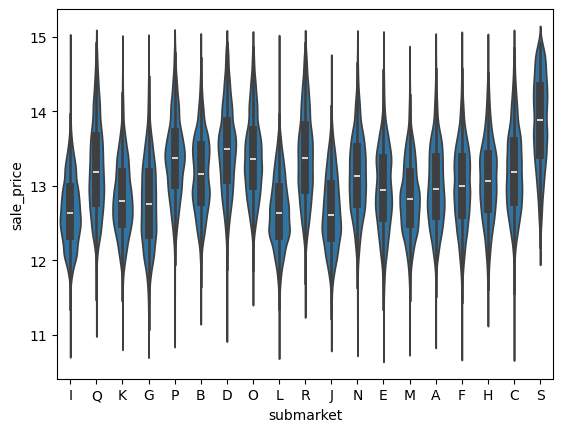

In [16]:
sns.violinplot(data=train, x="submarket", y="sale_price")